# Step:1 Importing the required Libraries

These four packages are fundamental libraries that we will need to import on every occasion.

NumPy is a versatile package designed for processing arrays of data. It offers a high-speed, multi-dimensional array structure, along with a range of tools for effectively manipulating these arrays. As such, it serves as the cornerstone of scientific computing with Python.

In [1]:
import numpy as np

This Python package provides an array of data structures and functionalities for handling numerical data and time series with ease. Its strength lies in simplifying the import and analysis of data, making it a widely favored tool for data manipulation.

In [2]:
import pandas as pd 

Matplotlib is a remarkable Python library that enables the creation of 2D plots for arrays, making it a powerful tool for data visualization. This multi-platform library is constructed on NumPy arrays and integrated with the broader SciPy stack. It was first introduced by John Hunter in 2002, and offers a range of plots including line, bar, scatter, histogram, and more

In [3]:
import matplotlib.pyplot as plt

Seaborn is a Python data visualization library that builds on the foundation of Matplotlib. It offers an intuitive and sophisticated interface for producing visually appealing and informative statistical graphics.

In [4]:
import seaborn as sns

The terminal will not display any warning messages. You can choose to disregard any warning messages that may appear.

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Step:2 Importing the Dataset


Datasets are typically provided in the CSV format, which stores tabular data as plain text. Each line in the file represents a record of data. To read a local CSV file into a DataFrame, we utilize the read_csv method from the pandas library. From there, we create separate matrices and vectors for independent and dependent variables, respectively, based on the DataFrame.

In [6]:
# Importing dataset
dataset = pd.read_csv(r'Dataset/DataCoSupplyChainDataset.csv',encoding='latin-1')

In [7]:
# Preview data
dataset.head()
#dataset.tail(5)
#dataset.sample(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [8]:
#Verifying it as a 'dataframe' object in pandas
type(dataset)

pandas.core.frame.DataFrame

In [9]:
# Dataset dimensions - (rows, columns)
dataset.shape

(180519, 53)

In [10]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [11]:
# Adding first name and last name together to create new column

dataset['Customer Full Name'] = dataset['Customer Fname'].astype(str)+dataset['Customer Lname'].astype(str)

In [12]:
dataset=dataset.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Latitude','Longitude','Product Description','Product Image','Order Zipcode','shipping date (DateOrders)'],axis=1)
dataset.shape

(180519, 42)

In [13]:
dataset['fraud'] = np.where(dataset['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)
dataset['late_delivery']=np.where(dataset['Delivery Status'] == 'Late delivery', 1, 0)
dataset.shape

(180519, 44)

In [14]:
#Dropping columns with repeated values

dataset.drop(['Delivery Status','Late_delivery_risk','Order Status','order date (DateOrders)'], axis=1, inplace=True)
dataset.shape

(180519, 40)

In [15]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Days for shipping (real),180519.0,3.497654,1.623722,0.00000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.00000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.97998,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.49000,104.379997,163.990005,247.399994,1939.989990
Category Id,180519.0,31.851451,15.640064,2.00000,18.000000,29.000000,45.000000,76.000000
Customer Id,180519.0,6691.379495,4162.918106,1.00000,3258.500000,6457.000000,9779.000000,20757.000000
Customer Zipcode,180516.0,35921.126914,37542.461122,603.00000,725.000000,19380.000000,78207.000000,99205.000000
Department Id,180519.0,5.443460,1.629246,2.00000,4.000000,5.000000,7.000000,12.000000
Order Customer Id,180519.0,6691.379495,4162.918106,1.00000,3258.500000,6457.000000,9779.000000,20757.000000
Order Id,180519.0,36221.894903,21045.379569,1.00000,18057.000000,36140.000000,54144.000000,77204.000000


In [16]:
# Count of null values
dataset.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total    

# Step:3 Encoding Categorical Data

Categorical data refers to variables that comprise label values rather than numerical values. The number of potential values is often restricted to a fixed set. However, values such as "YES" and "NO" cannot be incorporated into the mathematical equations used in the model. Therefore, we need to encode these variables into numeric values. To accomplish this, we can import the LabelEncoder class from the sklearn.preprocessing library.

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
# creating instance of labelencoder
le = LabelEncoder()

In [19]:
# Assigning numerical values and storing in another column

dataset['Customer Country']  = le.fit_transform(dataset['Customer Country'])
dataset['Market']            = le.fit_transform(dataset['Market'])
dataset['Type']              = le.fit_transform(dataset['Type'])
dataset['Product Name']      = le.fit_transform(dataset['Product Name'])
dataset['Customer Segment']  = le.fit_transform(dataset['Customer Segment'])
dataset['Customer State']    = le.fit_transform(dataset['Customer State'])
dataset['Order Region']      = le.fit_transform(dataset['Order Region'])
dataset['Order City']        = le.fit_transform(dataset['Order City'])
dataset['Category Name']     = le.fit_transform(dataset['Category Name'])
dataset['Customer City']     = le.fit_transform(dataset['Customer City'])
dataset['Department Name']   = le.fit_transform(dataset['Department Name'])
dataset['Order State']       = le.fit_transform(dataset['Order State'])
dataset['Shipping Mode']     = le.fit_transform(dataset['Shipping Mode'])
dataset['Order Country']     = le.fit_transform(dataset['Order Country'])
dataset['Customer Full Name']= le.fit_transform(dataset['Customer Full Name'])

dataset.head(5)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Order Region,Order State,Product Card Id,Product Category Id,Product Name,Product Price,Shipping Mode,Customer Full Name,fraud,late_delivery
0,1,3,4,91.250000,314.640015,73,40,66,1,20755,...,15,475,1360,73,78,327.75,3,1876,0,0
1,3,5,4,-249.089996,311.359985,73,40,66,1,19492,...,13,841,1360,73,78,327.75,3,5378,0,1
2,0,4,4,-247.779999,309.720001,73,40,452,0,19491,...,13,841,1360,73,78,327.75,3,4429,0,0
3,1,3,4,22.860001,304.809998,73,40,285,0,19490,...,11,835,1360,73,78,327.75,3,12929,0,0
4,2,2,4,134.210007,298.250000,73,40,66,1,19489,...,11,835,1360,73,78,327.75,3,10638,0,0


# Step:4 Handling the Missing Data

Data is often heterogeneous in nature, and may contain missing values due to a variety of reasons. To prevent such missing values from impacting the performance of our machine learning model, we can replace them with the mean or median of the entire column. This can be accomplished using the Imputer class of the sklearn.preprocessing library.

In [20]:
dataset_new = dataset

In [21]:
dataset_new=dataset_new.fillna(0)

In [22]:
# Count of NaN
dataset_new.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id                    0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total    

In [23]:
# Statistical summary
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,180519.0,1.675137,0.994647,0.00000,1.000000,2.000000,3.000000,3.000000
Days for shipping (real),180519.0,3.497654,1.623722,0.00000,2.000000,3.000000,5.000000,6.000000
Days for shipment (scheduled),180519.0,2.931847,1.374449,0.00000,2.000000,4.000000,4.000000,4.000000
Benefit per order,180519.0,21.974989,104.433526,-4274.97998,7.000000,31.520000,64.800003,911.799988
Sales per customer,180519.0,183.107609,120.043670,7.49000,104.379997,163.990005,247.399994,1939.989990
Category Id,180519.0,31.851451,15.640064,2.00000,18.000000,29.000000,45.000000,76.000000
Category Name,180519.0,26.782405,14.204351,0.00000,12.000000,30.000000,38.000000,49.000000
Customer City,180519.0,193.986633,160.930467,0.00000,66.000000,98.000000,324.000000,562.000000
Customer Country,180519.0,0.384297,0.486430,0.00000,0.000000,0.000000,1.000000,1.000000
Customer Id,180519.0,6691.379495,4162.918106,1.00000,3258.500000,6457.000000,9779.000000,20757.000000


# Step:5 Feature Scaling


In most machine learning algorithms, the Euclidean distance between two data points is a key factor in their calculations. However, issues can arise when features have highly variable magnitudes, units, and ranges. This is because high-magnitude features will carry more weight in distance calculations than low-magnitude features. To address this problem, we can perform feature standardization or Z-score normalization. This can be accomplished using the StandardScaler class from the sklearn.preprocessing library.

In [24]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler


In [25]:
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [26]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [27]:

X = dataset_new.iloc[:,0:38].values
Y = dataset.late_delivery.values

# Step:6 Splitting the dataset into testing set and training set

To train and evaluate a machine learning model, we typically split the dataset into two partitions: a training set and a test set. The training set is used to train the model, while the test set is used to assess the performance of the trained model. This partition is often performed with an 80/20 split. To accomplish this, we can import the train_test_split() method from the sklearn.model_selection library.

In [28]:
# Splitting X and Y
#Controls the shuffling applied to the data before applying the split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset['fraud'] )

In [29]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (144415, 38)
X_test shape: (36104, 38)
Y_train shape: (144415,)
Y_test shape: (36104,)


# Step:7 MACHINE LEARNING ALGORITHMS

Scikit-learn is a powerful open-source Python library that offers a wide range of machine learning capabilities, including pre-processing, model selection, cross-validation, and visualization algorithms, all accessible through a unified interface.

Key features of scikit-learn include:

Simple and efficient tools for data mining and analysis
A variety of classification, regression, and clustering algorithms, such as support vector machines, random forests, gradient boosting, k-means, and more   

# Logistic Regression Algorithm

In [30]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)


LogisticRegression(random_state=42)

# K nearest neighbors Algorithm

In [31]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=24)

# Random forest Algorithm

In [32]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

# Making predictions on test dataset

In [33]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)


# Step:8 Model Evaluation

In [34]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score

In [35]:
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)


In [36]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))


Logistic Regression: 55.04930201639707
K Nearest neighbors: 60.13461112342122
Random Forest: 98.18025703523155


In [37]:
a=accuracy_logreg * 100
b=accuracy_knn * 100
e=accuracy_ranfor * 100


In [38]:
scores = [a,b,e]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 55.04930201639707 %
The accuracy score achieved using K-Nearest Neighbors is: 60.13461112342122 %
The accuracy score achieved using Random Forest is: 98.18025703523155 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

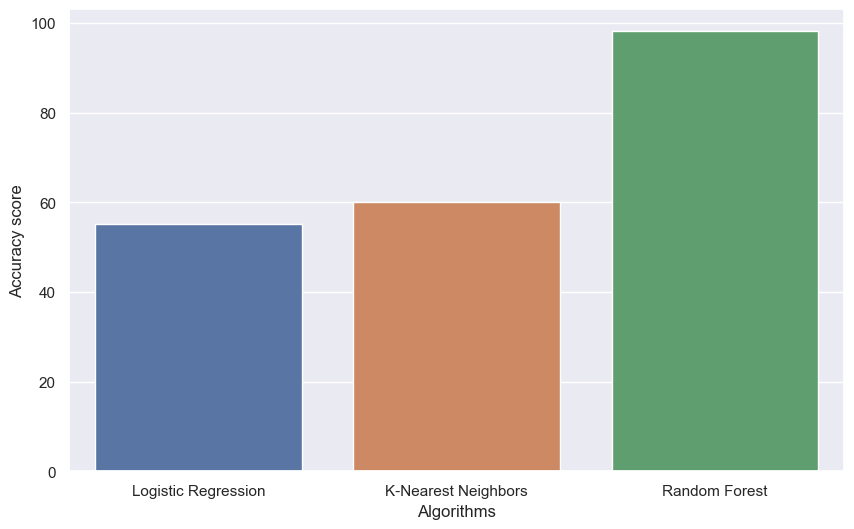

In [39]:
sns.set(rc={'figure.figsize':(10,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### Random Forest Evaluation

In [40]:
# Classification report for Random Forest

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_ranfor))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     16229
           1       0.97      1.00      0.98     19875

    accuracy                           0.98     36104
   macro avg       0.98      0.98      0.98     36104
weighted avg       0.98      0.98      0.98     36104



<AxesSubplot:>

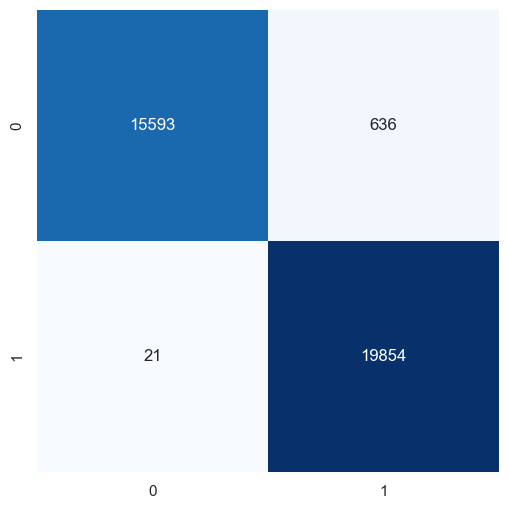

In [41]:
# confusion Matrix  for Random Forest

from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(Y_test, Y_pred_ranfor)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', cbar=False, fmt='g')

### K Nearest Neighbour Evaluation

In [42]:
# Classification report for K Nearest Neighbour

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55     16229
           1       0.63      0.65      0.64     19875

    accuracy                           0.60     36104
   macro avg       0.60      0.60      0.60     36104
weighted avg       0.60      0.60      0.60     36104



<AxesSubplot:>

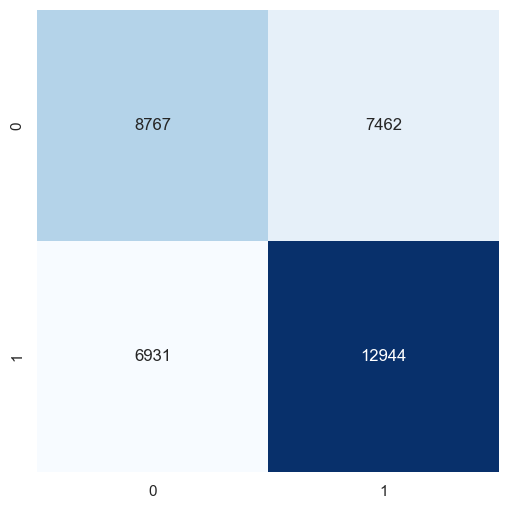

In [43]:
# confusion Matrix  for K Nearest Neighbour

from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(Y_test, Y_pred_knn)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', cbar=False, fmt='g')

### Logistic Regression Evaluation

In [44]:
# Classification report for Logistic Regression

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_logreg))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     16229
           1       0.55      1.00      0.71     19875

    accuracy                           0.55     36104
   macro avg       0.28      0.50      0.36     36104
weighted avg       0.30      0.55      0.39     36104



<AxesSubplot:>

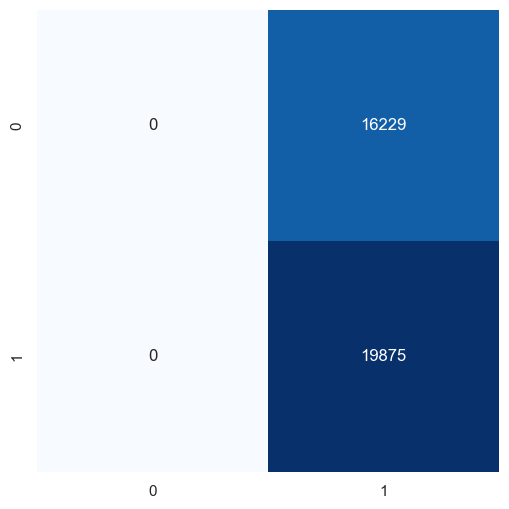

In [45]:
# confusion Matrix  for Logistic Regression

from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(Y_test, Y_pred_logreg)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', cbar=False, fmt='g')

# Hybrid Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression


class HybridClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, dt=None, mlp=None):
        
        self.dt = DecisionTreeClassifier() if dt is None else dt
        self.mlp = MLPClassifier() if mlp is None else mlp
        self.final_classifier = None

    def fit(self, X, y):
        
        # Fit both models
        self.mlp.fit(X, y)
        self.dt.fit(X, y)

        # Extract predictions from both models
        dt_pred = self.dt.predict(X)
        mlp_pred = self.mlp.predict(X)

        # Concatenate the predictions
        X_new = np.concatenate([dt_pred.reshape(-1, 1), mlp_pred.reshape(-1, 1)], axis=1)

        # Train a final classifier
        self.final_classifier = LogisticRegression().fit(X_new, y)
        return self

    def predict(self, X):
        # Extract predictions from both models
        dt_pred = self.dt.predict(X)
        mlp_pred = self.mlp.predict(X)

        # Concatenate the predictions
        X_new = np.concatenate([dt_pred.reshape(-1, 1), mlp_pred.reshape(-1, 1)], axis=1)

        # Make final predictions
        return self.final_classifier.predict(X_new)


In [48]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Train the hybrid classifier
hybrid = HybridClassifier()

hybrid.fit(X_train, y_train)


HybridClassifier(dt=DecisionTreeClassifier(), mlp=MLPClassifier())

In [49]:
# Make predictions
y_pred = hybrid.predict(X_test)

In [50]:
# Classification report 

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     16425
           1       0.99      0.99      0.99     19679

    accuracy                           0.99     36104
   macro avg       0.99      0.99      0.99     36104
weighted avg       0.99      0.99      0.99     36104



<AxesSubplot:>

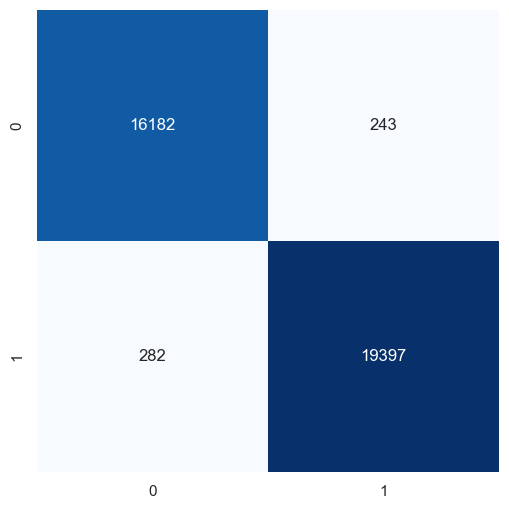

In [51]:

from sklearn.metrics import confusion_matrix
matrix_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', cbar=False, fmt='g')